# Clustering metrics - alternatives to the _elbow method_
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

Clustering is an important part of the machine learning pipeline for business or scientific enterprises utilizing data science. As the name suggests, it helps to identify congregations of closely related (by some measure of distance) data points in a blob of data, which, otherwise, would be difficult to make sense of.

A popular method like k-means clustering does not seem to provide a completely satisfactory answer when we ask the basic question: 
> **"How would we know the actual number of clusters, to begin with?"**

This question is critically important because of the fact that the process of clustering is often a precursor to further processing of the individual cluster data and therefore, the amount of computational resource may depend on this measurement. 

In the case of a business analytics problem, repercussion could be worse. Clustering is often done for such analytics with the goal of market segmentation. It is, therefore, easily conceivable that, depending on the number of clusters, appropriate marketing personnel will be allocated to the problem. Consequently, a wrong assessment of the number of clusters can lead to sub-optimum allocation of precious resources.

For the k-means clustering method, the most common approach for answering this question is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

In this notebook, we show what metric to use for visualizing and determining an optimal number of clusters much better than the usual practice - elbow method.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create synthetic data using Scikit learn `make_blob` method

- Number of features: 4
- Number of clusters: 5
- Number of samples: 200

In [4]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [50]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [51]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [52]:
d1 = data1[0]

In [53]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,3.474389,-7.758582,-2.693935,-1.732920
1,5.636721,-2.850638,2.179627,3.270721
2,5.709399,-5.023879,-3.071929,-3.119179
3,7.262765,-4.438562,-4.439733,-2.145358
4,7.372437,-5.512132,-4.932416,-3.470501


In [54]:
from itertools import combinations

In [55]:
lst_vars=list(combinations(df1.columns,2))

In [56]:
lst_vars

[('Feature_1', 'Feature_2'),
 ('Feature_1', 'Feature_3'),
 ('Feature_1', 'Feature_4'),
 ('Feature_2', 'Feature_3'),
 ('Feature_2', 'Feature_4'),
 ('Feature_3', 'Feature_4')]

In [57]:
len(lst_vars)

6

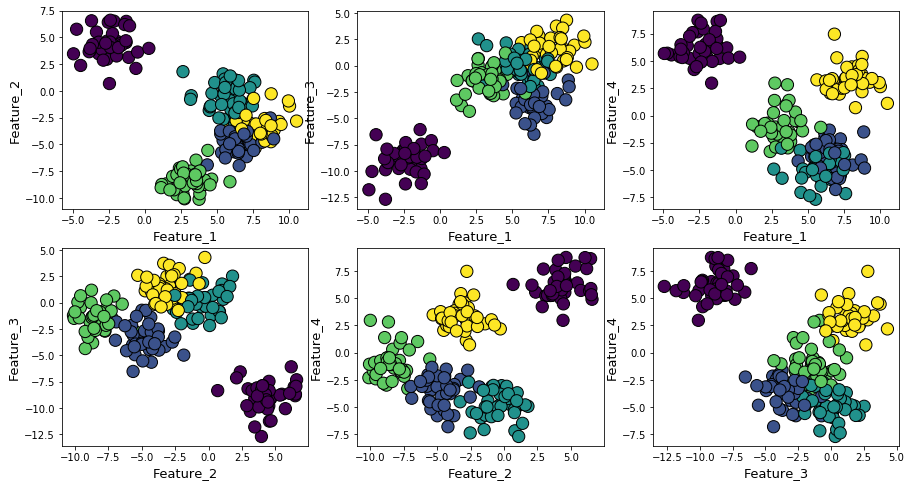

In [58]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

### How are the classes separated (boxplots)

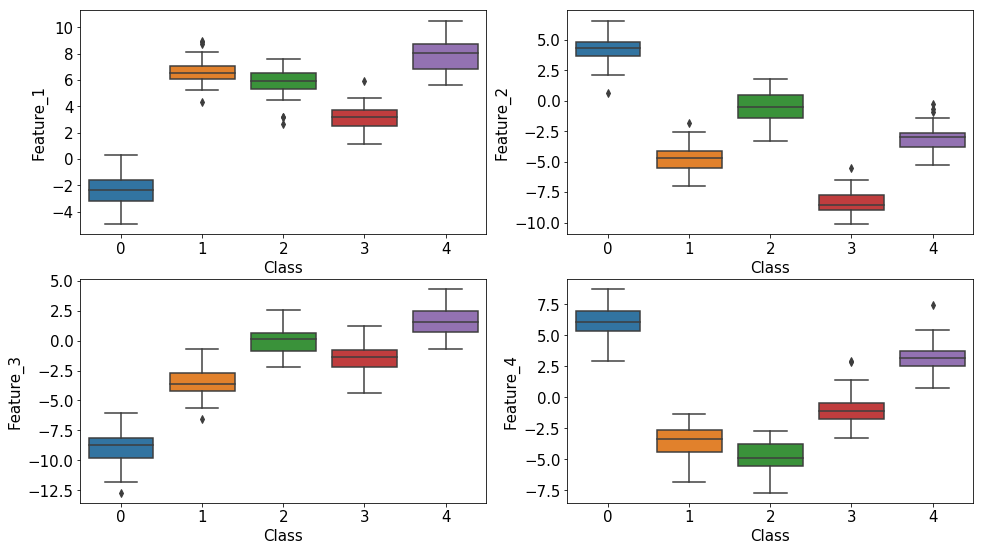

In [59]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

## k-means clustering

In [60]:
from sklearn.cluster import KMeans

### Unlabled data

In [61]:
X=df1

In [62]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,3.474389,-7.758582,-2.693935,-1.732920
1,5.636721,-2.850638,2.179627,3.270721
2,5.709399,-5.023879,-3.071929,-3.119179
3,7.262765,-4.438562,-4.439733,-2.145358
4,7.372437,-5.512132,-4.932416,-3.470501


In [63]:
y=data1[1]

### Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
X_scaled=scaler.fit_transform(X)

### Metrics

In [67]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Running k-means and computing inter-cluster distance score for various *k* values

In [70]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -18.532828768202894
Silhouette score for number of cluster(s) 2: 0.6312468337992185
Davies Bouldin score for number of cluster(s) 2: 0.4659829851279811
V-measure score for number of cluster(s) 2: 0.47435098761403227
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -11.771131787182135
Silhouette score for number of cluster(s) 3: 0.4921805683934768
Davies Bouldin score for number of cluster(s) 3: 0.7092542242499751
V-measure score for number of cluster(s) 3: 0.7424834172925047
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -6.419547274655223
Silhouette score for number of cluster(s) 4: 0.5583660111201024
Davies Bouldin score for number of cluster(s) 4: 0.6490743321066312
V-measure score for number of cluster(s) 4: 0.873186597802491
----------------------------------------------------

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/met

Score for number of cluster(s) 9: -3.3402988391170165
Silhouette score for number of cluster(s) 9: 0.30476045894205306
Davies Bouldin score for number of cluster(s) 9: 1.441081682613259
V-measure score for number of cluster(s) 9: 0.8368842260979149
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 10: -3.2369532569161805
Silhouette score for number of cluster(s) 10: 0.2033265863722887
Davies Bouldin score for number of cluster(s) 10: 1.6647019142442523
V-measure score for number of cluster(s) 10: 0.8063791024207458
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 11: -3.0853190666908312
Silhouette score for number of cluster(s) 11: 0.22544046978757112
Davies Bouldin score for number of cluster(s) 11: 1.555007581358752
V-measure score for number of cluster(s) 11: 0.8120471075820389
-------------------------------------------

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


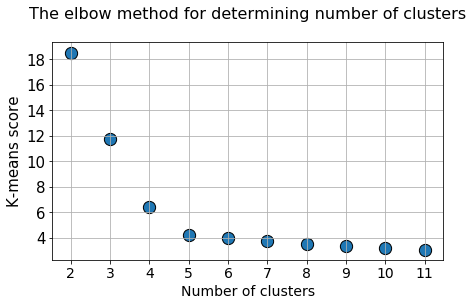

In [71]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

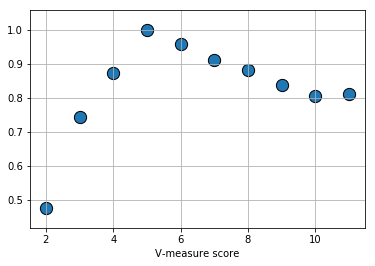

In [72]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

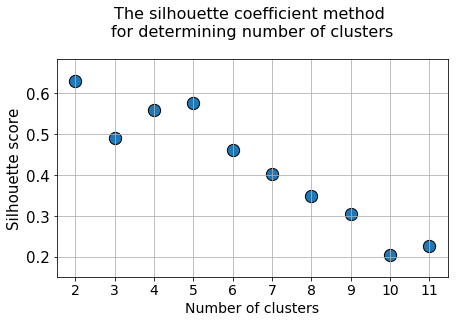

In [73]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

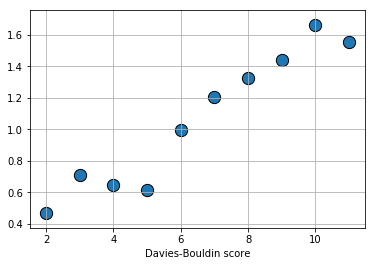

In [74]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

## Expectation-maximization (Gaussian Mixture Model)

In [75]:
from sklearn.mixture import GaussianMixture

In [76]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -751.1863887113974
Log-likelihood score for number of cluster(s) 2: 2.2620939808532263
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -943.9457296684154
Log-likelihood score for number of cluster(s) 3: 2.9426792344913224
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -970.5509836946569
Log-likelihood score for number of cluster(s) 4: 3.2078792708024775
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -940.2056616266809
Log-likelihood score for number of cluster(s) 5: 3.330702866878089
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -903.5909280626677
Log-likelihood score for number of cluster(s) 6: 3.4378529342136073
--

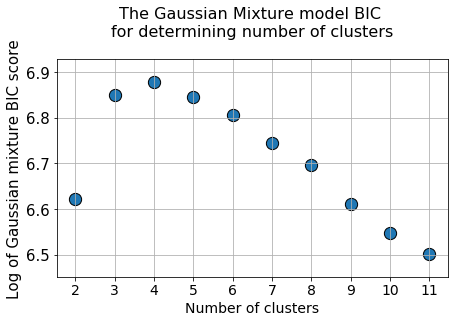

In [77]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

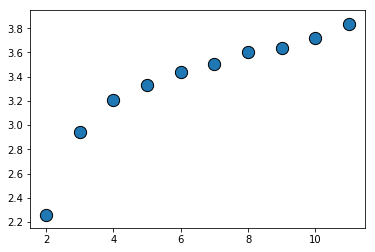

In [78]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()